# This assignment was made by Jakob Sørensen, Andreas Uldall Leonhard og Yosuke Ueda

In [371]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [372]:
df = pd.read_json('users.json') 

In [373]:
df.head()

,about,created,error,id,karma,submitted
0,NaN,1.510266e+09,NaN,gcgggfxsdg,-1.0,5
1,"Ruby, Open Source, Devops",1.325548e+09,NaN,sheerun,102.0,51
2,NaN,1.459331e+09,NaN,keypress,79.0,70
3,[ my public key: https:&#x2F;&#x2F;keybase.io&...,1.379698e+09,NaN,pyprism,1356.0,114
4,Email: ejstronge@gmail.com\nGithub: https:&#x2...,1.355740e+09,NaN,ejstronge,460.0,144


# An overview of the data statistics

In [374]:
df.describe()

,created,karma,submitted
count,9.299000e+03,9299.000000,9431.000000
mean,1.382438e+09,4002.617056,1347.067755
std,9.009812e+07,8899.272789,2714.916020
min,1.171924e+09,-20.000000,0.000000
25%,1.316712e+09,157.000000,65.000000
50%,1.386480e+09,965.000000,374.000000
75%,1.462888e+09,3427.000000,1311.000000
max,1.510574e+09,118864.000000,20782.000000


In [375]:
len(df)

9431

In [376]:
df.shape

(9431, 6)

In [377]:
def convertunixtime(a):
    return a/(60*60*24*365)

In [378]:
convertunixtime(1500000000)

47.564687975646876

In [379]:
df=df[df['created'].notnull()]

In [380]:
df=df[df['karma'].notnull()]

In [381]:
x = df['created']
y = df['karma']

In [382]:
x.shape
y.shape

(9299,)

# Part 1.1 Data preprocessing

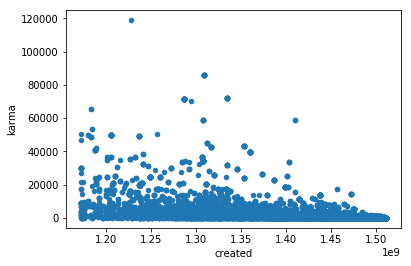

In [383]:
df.plot.scatter(x = 1, y = 4)

# Part 1.2 Model Selection

# We have choosen linear regression model, because it seems to fits the scatter plots shown in the graph above. There are some outlieres, but the majority of the data points are gathered in a cluster. We can almost see a straight line through the data points. 

# Part 1.3 Model training

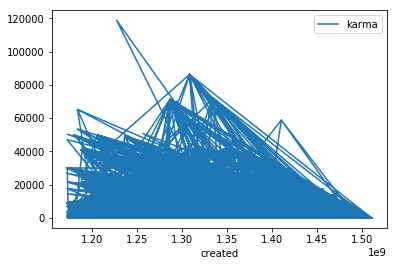

In [384]:
df.plot(x=1, y=4)

In [385]:
xs_re=np.array(x).reshape(-1,1)
ys_re=np.array(y).reshape(-1,1)

In [386]:
import sklearn.linear_model

In [387]:
model = sklearn.linear_model.LinearRegression()
model.fit(xs_re,ys_re)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Part 1.4: Model evaluation

In [388]:
model.coef_

array([[-3.68490613e-05]])

In [389]:
model.intercept_

array([54944.17572095])

In [390]:
def f(x):
    return -3.68490613e-05*x + 54944.17572095

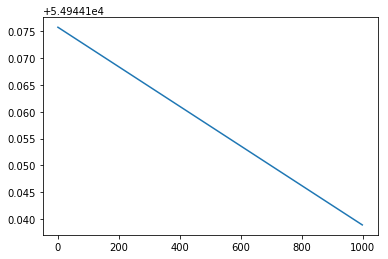

In [391]:
plt.plot(np.arange(1000),f(np.arange(1000)))

# We have included created and karma in order to predict when a user will hit 1000 points. We see that there is a negative coefficient which translates to loosing points over time. This means in order to get a 1000 points, we used the data for model fitting

In [392]:
f(1000)

54944.1388718887

# Predicting with a random chosen input time

In [393]:
model.predict(1462274014)

array([[1060.75091111]])

# Model prediction: The model predicts that with a given input time of 1462274014 the output return 1060,75 points 

# Part 2: Predicting Hackernews points with multivariate linear regression 

In [394]:
df=df[df['submitted'].notnull()]

In [395]:
z = df['submitted']

In [396]:
zs_re=np.array(z).reshape(-1,1)

In [397]:
zs_re.shape

(9299, 1)

In [398]:
ys_re.shape

(9299, 1)

In [399]:
xs_re.shape

(9299, 1)

In [400]:
model.fit(df[['created','submitted']],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [401]:
model.coef_

array([-6.70038250e-06,  2.66071059e+00])

In [402]:
model.intercept_

9630.448538528279

In [403]:
def f2(time, upvotes):
    return -6.70038250e-06*time + 2.66071059e+00*upvotes + 9630.448538528279

In [404]:
f2(1000,500)

10960.79713314578

In [405]:
model.predict([[1462274014,440]])

array([1003.36597865])

# Model prediction with upvote: The model predicts that with a given input time of 1462274014 and additional input upvotes with 440 points, the model returns a  prediction of 1003 points

# Part 3: Prediction of breast cancer with logistic regression

## Due to server complications (possibly from maintenance) the download of the Wisconsin breastcancer data from the site http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data could not be performed, and hence why we have retrieved an identical dataset from Kaggle site. Fortunately this dataset came with the header (column names). 

## The unaccessable link above had meta-data about the headers, but as we could not access the site, we would instead describe our intended procedure.  One can add columns and column names with the following script. data = ["Diagnosis", "radius_mean", "Texture_mean", "Perimeter_mean"......etc.] or when reading the csv file add the header. This is all done with Pandas dataframe.

In [406]:
data = pd.read_csv("wisconsin_breastcancer.csv")

In [407]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Size of the data 

In [408]:
len(data)

569

In [409]:
data.shape

(569, 33)

## The different variables are description of the diagnosis procedure which all have an impact on the type of cancer. They are divided according to category of mean, SE and worst. 

In [410]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

## The data seems clean as there is no NULL and NAN values.

## We will label "diagnosis" column as the Y. This should contain information regarding the cancer type (Benign or Malign)

## We assign the rest (all other) variables to X. Just for later purpose

In [411]:
X = data.iloc[:, 2:31].values
Y = data.iloc[:, 1].values

## Converting the 2 types of breast cancer (Benign, Malign) into numerical values using LabelEncoder from Sklearn Preprocessing. The types of cancer can now be classified from B and M to 1 and 0.  

In [412]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
Y = label.fit_transform(Y)

In [413]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

# 3.2: Building the model

## These numbers (X variables) are all related to determine if the cancer is Benign or Malign. 

## We have chosen to assign the X variable to 3 categories mean, SE and worst. (We only needed at least 2 inputs according to our assignment)

In [414]:
mean = data.iloc[:,2:12].values
SE = data.iloc[:,13:22].values
worst = data.iloc[:,23:32].values

## Our choice is just based on the fact that each category could have an impact on the cancer outcome. To limit ourselves we will only make the model training/prediction with mean, SE and the rest (all) 

In [415]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# 3.3 Evaluating the model

## We initiate the training with the mean category we specified above and split the data into training and test data with 70%training and 30% testing. For displaying the predictability we attend to use the accuracy_score and cross_val_score from sklearn metrics. 

In [416]:
xmean_train, xmean_test, ymean_train, ymean_test = train_test_split(mean, Y, test_size = 0.30, random_state = 42)

In [417]:
logisticModel = LogisticRegression()
logisticModel.fit(xmean_train, ymean_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [418]:
print(cross_val_score(logisticModel, xmean_train, ymean_train)) 

[0.87969925 0.90977444 0.87121212]


## The training model performs 0.879 = 88% in score

In [419]:
predicting_mean = logisticModel.predict(xmean_test)

In [420]:
print(accuracy_score(predicting_mean,ymean_test))

0.935672514619883


## For category mean our trained a model performs a predict score with 0.935 = 93% predictability with test data (the rest 30%) it has not seen before. It means that the model performs better with test data than training data and could show sign of overfitting.

## Model training for category SE

In [421]:
xse_train, xse_test, yse_train, yse_test = train_test_split(SE, Y, test_size = 0.30, random_state = 42)

In [422]:
logisticModel.fit(xse_train,yse_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [423]:
print(cross_val_score(logisticModel, xse_train, yse_train)) 

[0.85714286 0.92481203 0.85606061]


In [424]:
predicting_se = logisticModel.predict(xse_test)

In [425]:
print(accuracy_score(predicting_se,yse_test))

0.8947368421052632


## The training model performs a score of 85% and the predictability performs a score of 0.89 = 89%

## Training and predicting with the all the other variables (X)

In [426]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [427]:
logisticModel = LogisticRegression()
logisticModel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [428]:
print(cross_val_score(logisticModel, X_train, Y_train)) 

[0.93233083 0.97744361 0.93181818]


In [429]:
predicting_y = logisticModel.predict(X_test)

In [430]:
print(accuracy_score(predicting_y,Y_test))

0.9649122807017544


## The training model performs a score of 93% and the predictability performs a score of 0.96 = 96%. The percentage displays the models ability if any given input is feeded to the trained model to predict whether it is 1 or 0 (Benign or Malign) 